## 1.1. Скачать данные kc-house-data и laptop_price

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv', sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 1.2 Изучите стоимости недвижимости

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

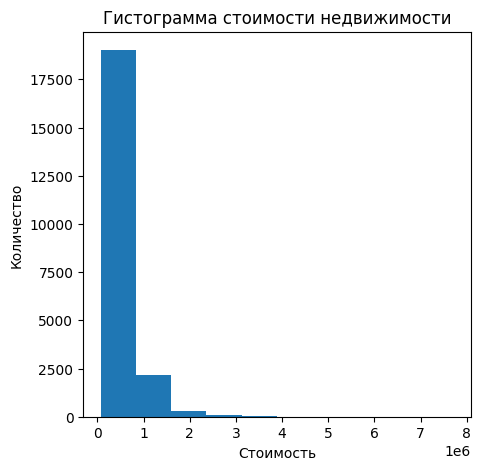

In [5]:
plt.figure(figsize=(5, 5))
plt.hist(df['price'])
plt.title('Гистограмма стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

### ВЫВОД К ЗАДАЧЕ: 1.2 - Очень много дешёвых домов и очень мало дорогостоящих.

## 1.3 Изучите распределение квадратуры жилой

In [6]:
df["sqft_living"].value_counts()

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

In [7]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

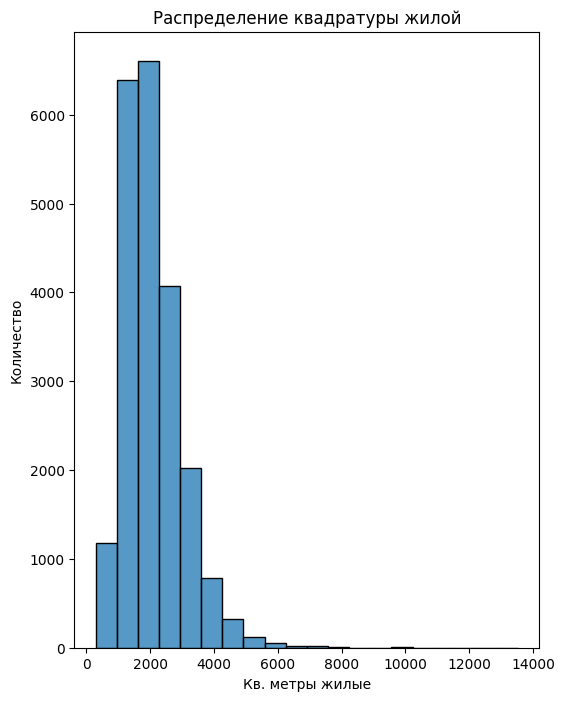

In [8]:
plt.figure(figsize=(6, 8))
sb.histplot(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество');

### ВЫВОД К ЗАДАЧЕ: 1.3 - Домов с большой квадратурой гораздо меньше, чем домов со средней и не большой квадратурой. Возможно есть связь между квадратурой и стоимостью дома, т.к. движения в графиках с квадратурой и с ценой похожи.

## 1.4 Изучите распределение года постройки

In [9]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

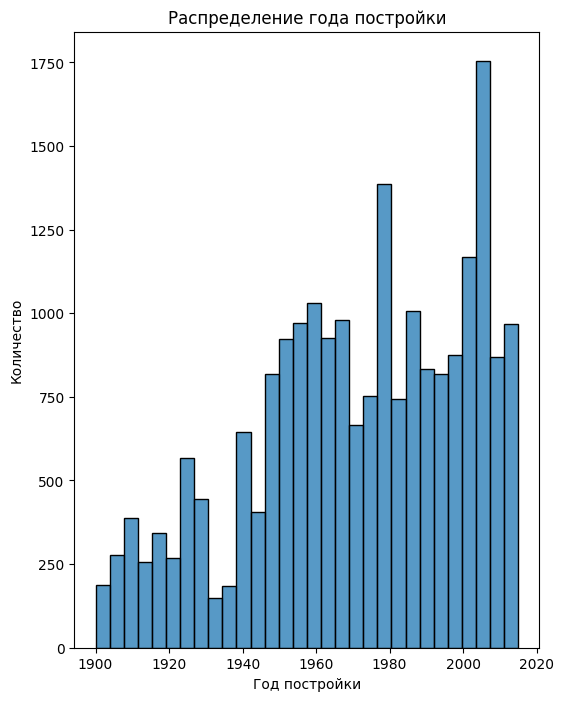

In [10]:
plt.figure(figsize=(6, 8))
sb.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

### ВЫВОД К ЗАДАЧЕ: 1.4 - Самые старые дома построены в 1900, а самые молодые - 2018-2019 гг., причём новых домов с годами становится всё больше. Возможно это связанно с тем, что старые дома приходят в негодность и их сносят.

##  2.1 Изучите распределение домов от наличия вида на набережную

Постройте график и сделайте выводы

In [11]:
data = df['waterfront'].value_counts()

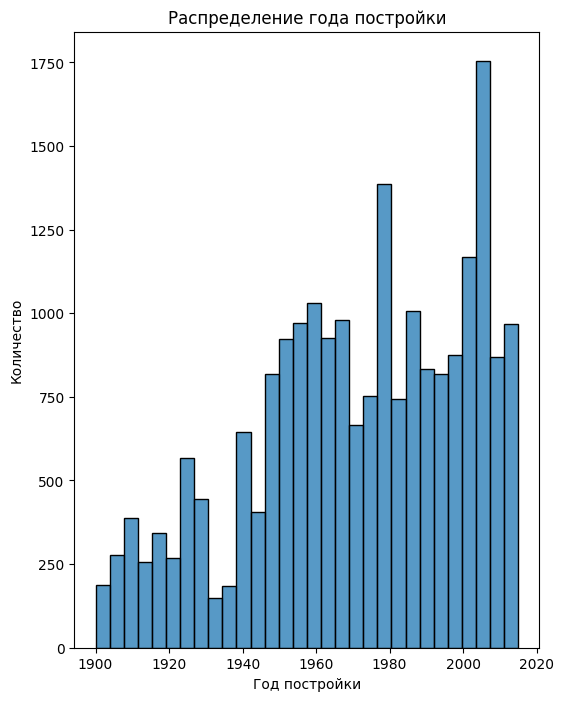

In [12]:
plt.figure(figsize=(6, 8))
sb.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

### ВЫВОД К ЗАДАЧЕ: 2.1 - Дома с видом на набережную составляют менее 1% от остальных домов. 

## 2.2 Изучите распределение этажей домов

In [13]:
data = df['floors'].value_counts()

In [14]:
df["floors"].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

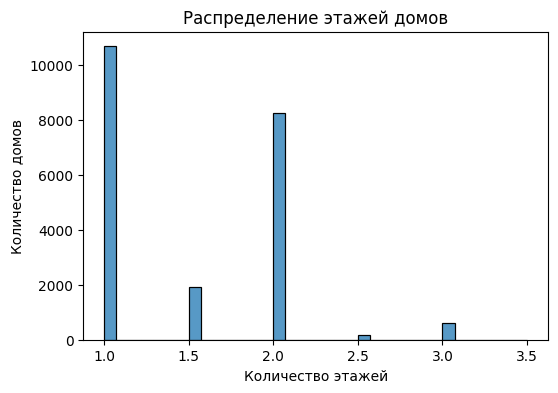

In [15]:
plt.figure(figsize=(6, 4))
sb.histplot(df['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

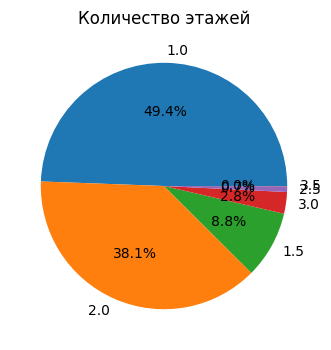

In [16]:
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

### ВЫВОД К ЗАДАЧЕ: 2.2 - Больше всего домов - одноэтажных; меньше всего - домов трёхэтажных с чердаком. 

## 2.3 Изучите распределение состояния домов

In [17]:
data = df['condition'].value_counts()

In [18]:
df["condition"].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

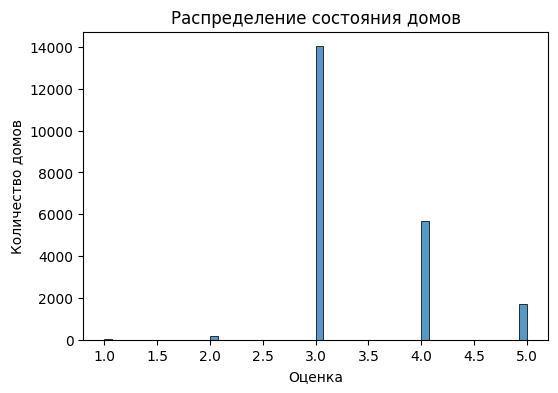

In [19]:
plt.figure(figsize=(6, 4))
sb.histplot(df['condition'])
plt.title('Распределение состояния домов')
plt.xlabel('Оценка')
plt.ylabel('Количество домов');

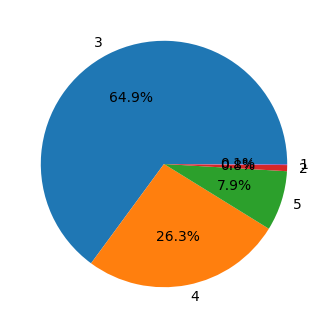

In [20]:
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

### ВЫВОД К ЗАДАЧЕ: 2.3 - Больше всего домов с оценкой 3, четверть состовляют дома с оценкой 4. Менее 1% домов имеют оценку 1. 

## Задача 3 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости на основе матрицы корреляции.Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [21]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


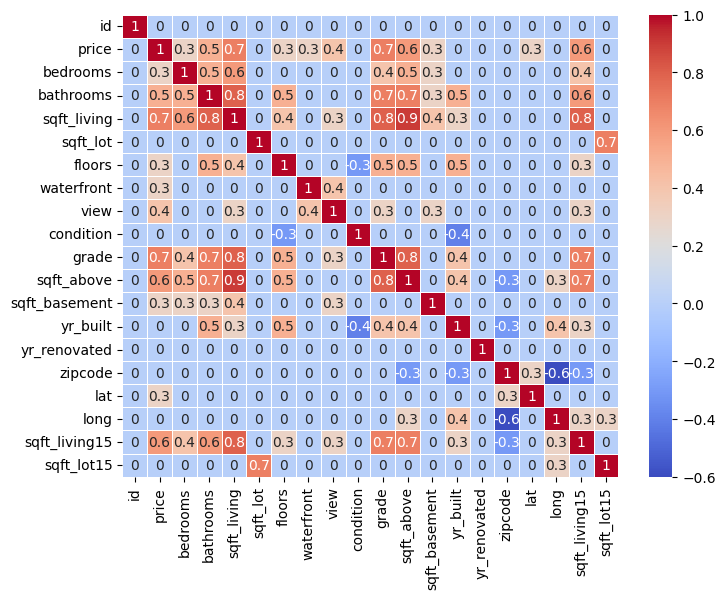

In [23]:
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

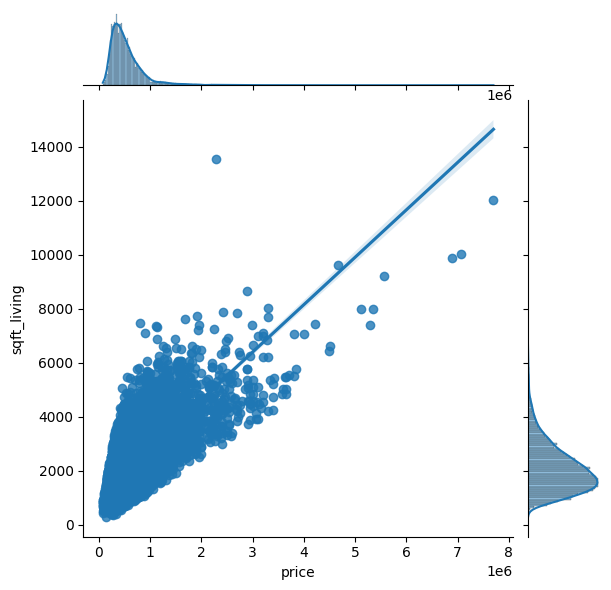

In [24]:
sb.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

#### Чем больше квадратура дома, тем выше его стоимость.

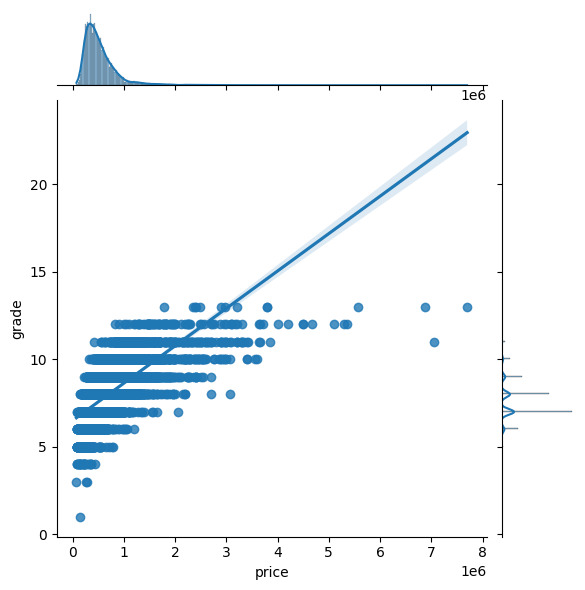

In [25]:
sb.jointplot(x=df['price'], y=df['grade'], kind='reg');

#### Также, от качества постройки дома, проработанности дизайна, зависит стоимость дома. Чем качественнее построенн дом, тем он дороже. 

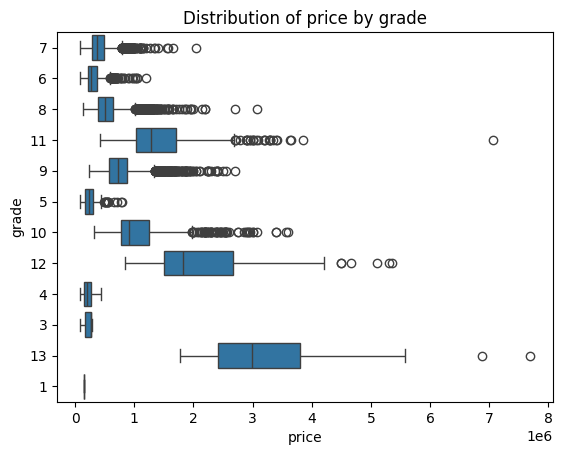

In [26]:
sb.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

#### Наибольшую стоимость имеют дома с оценкой 13

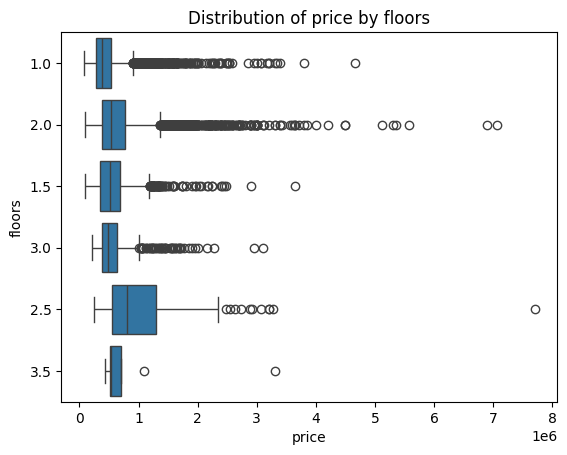

In [27]:
sb.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

#### Самую высокую стоимость имеют дома с количеством этажей 2,5